In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf


plt.rcParams['figure.figsize'] = (10,5)
sns.set(style = 'whitegrid')
pd.options.display.float_format = '{:.6f}'.format
print('Libraries imported')

Libraries imported


In [13]:
stocks = ['AAPL','MSFT','TSLA']
start_date = '2021-01-01'
end_date = '2024-12-31'
data = yf.download(stocks, start = start_date, end = end_date)['Close']


display(data.head())
print('\nInitial data shape:',data.shape)

/var/folders/0y/w_fcmvzx5sx6jjg9gtjt0zkw0000gn/T/ipykernel_2163/3392371388.py:4: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(stocks, start = start_date, end = end_date)['Close']
[*********************100%***********************]  3 of 3 completed


Ticker,AAPL,MSFT,TSLA
Date,,,
2021-01-04,126.096596,209.273148,243.256668
2021-01-05,127.655617,209.475006,245.036667
2021-01-06,123.358536,204.043472,251.993332
2021-01-07,127.567917,209.849991,272.013336
2021-01-08,128.668991,211.128540,293.339996



Initial data shape: (1004, 3)


In [8]:
ticker = "AAPL" 
display(data.isnull().sum())
data = data.ffill().dropna()
print('\nAfter filling shape:',data.shape)

Ticker
AAPL    0
MSFT    0
TSLA    0
dtype: int64


After filling shape: (1004, 3)


In [23]:
returns = data.pct_change().dropna()
mean_returns = returns.mean()
volatility = returns.std()
prob_profit = (returns>0).mean()
display(pd.DataFrame({'Mean Daily Return':mean_returns,'Volatility':volatility, 'Prob_Profit_Day' :prob_profit}))

,Mean Daily Return,Volatility,Prob_Profit_Day
Ticker,,,
AAPL,0.000828,0.016761,0.532403
MSFT,0.000836,0.016431,0.520439
TSLA,0.001249,0.037841,0.519442


In [ ]:
prob_loss = (returns<0).mean()
var_95 = returns.apply(lambda x:np.percentile(x,5))
display(pd.DataFrame({'Prob_Loss_Day':prob_loss,'Var_95':var_95}))

,Prob_Loss_Day,Var_95
Ticker,,
AAPL,0.464606,-0.026913
MSFT,0.478564,-0.026763
TSLA,0.479561,-0.060416


covariance matrix:


Ticker,AAPL,MSFT,TSLA
Ticker,,,
AAPL,0.000281,0.000187,0.000312
MSFT,0.000187,0.000270,0.000257
TSLA,0.000312,0.000257,0.001432



correlation matrix:


Ticker,AAPL,MSFT,TSLA
Ticker,,,
AAPL,1.000000,0.680606,0.492028
MSFT,0.680606,1.000000,0.412614
TSLA,0.492028,0.412614,1.000000


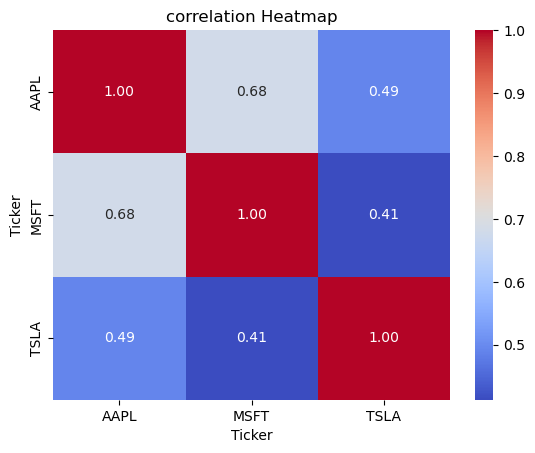

In [30]:
cov_matrix = returns.cov()
corr_matrix = returns.corr()
print('covariance matrix:')
display(cov_matrix)
print('\ncorrelation matrix:')
display(corr_matrix)
sns.heatmap(corr_matrix, annot=True, fmt='.2f',cmap='coolwarm')
plt.title('correlation Heatmap')
plt.show()

In [44]:
weights = np.array([0.4,0.3,0.3])
assert len(weights) == len(stocks)
weights = weights/weights.sum()
port_return = np.dot(weights, mean_returns)
port_variance = np.dot(weights.T,np.dot(cov_matrix,weights))
port_volatlity = np.sqrt(port_variance)
print(f'protfolio expected daily return: {port_return:.6f} ({port_returns*252:.2%}annualized approx)')
print(f'protfolio volatility (daily): {port_volatlity:.6f} ({port_volatlity*np.sqrt(252):.2%}annualized approx)')





protfolio expected daily return: 0.000957 (24.10%annualized approx)
protfolio volatility (daily): 0.019084 (30.29%annualized approx)


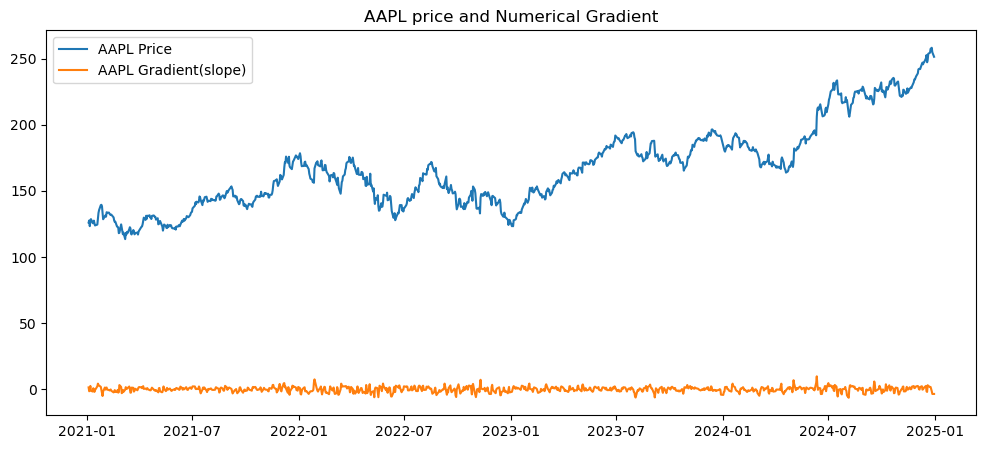

In [56]:
gradients = data.apply(lambda col: np.gradient(col.values))
data['AAPL_grad'] = gradients['AAPL']

plt.figure(figsize=(12,5))
plt.plot(data['AAPL'], label='AAPL Price')
plt.plot(data['AAPL_grad'], label='AAPL Gradient(slope)')
plt.legend()
plt.title('AAPL price and Numerical Gradient')
plt.show()


/var/folders/0y/w_fcmvzx5sx6jjg9gtjt0zkw0000gn/T/ipykernel_1492/1310834940.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(stocks, start = start_date, end = end_date)['Close']
[*********************100%***********************]  3 of 3 completed


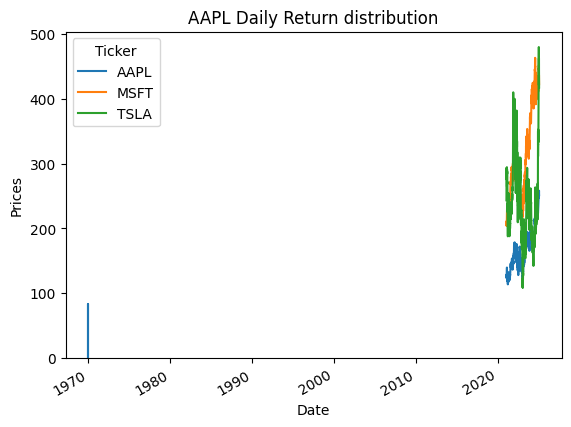

/var/folders/0y/w_fcmvzx5sx6jjg9gtjt0zkw0000gn/T/ipykernel_1492/1310834940.py:31: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.annotate(txt,(volatility[i],mean_returns[i]))


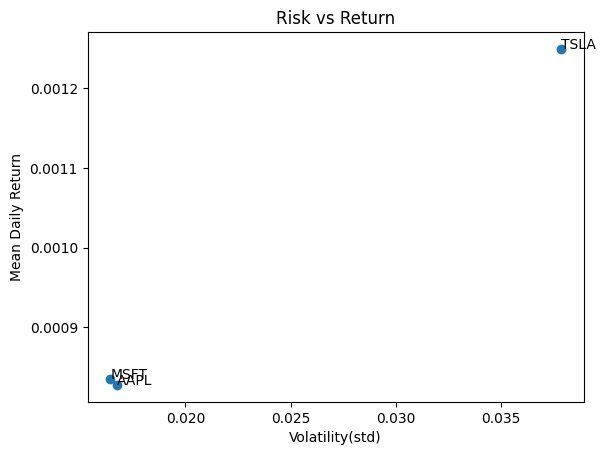

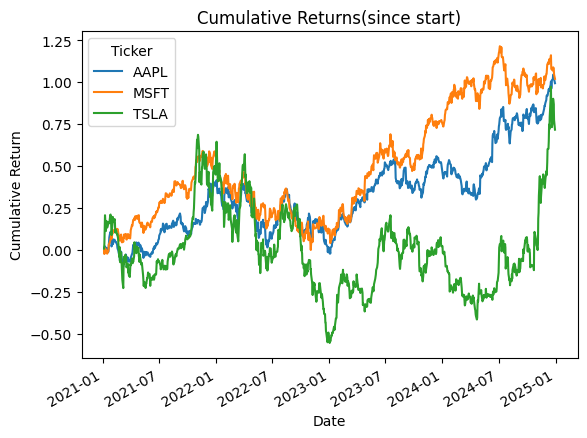

In [10]:
data.plot()
plt.title('Adjusted close Prices')
plt.ylabel('Prices')
plt.show


sns.histplot(returns['AAPL'],bins =50,kde=True)
plt.title('AAPL Daily Return distribution')
plt.show()


plt.scatter(volatility,mean_returns)
for i,txt in enumerate(stocks):
    plt.annotate(txt,(volatility[i],mean_returns[i]))
plt.xlabel('Volatility(std)')
plt.ylabel('Mean Daily Return')
plt.title('Risk vs Return')
plt.show()


cum_returns = (1+returns).cumprod()-1
cum_returns.plot()
plt.title('Cumulative Returns(since start)')
plt.ylabel('Cumulative Return')
plt.show()